In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/felip/OneDrive/Documentos/Escola/2018/IA/precos_casa_california.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


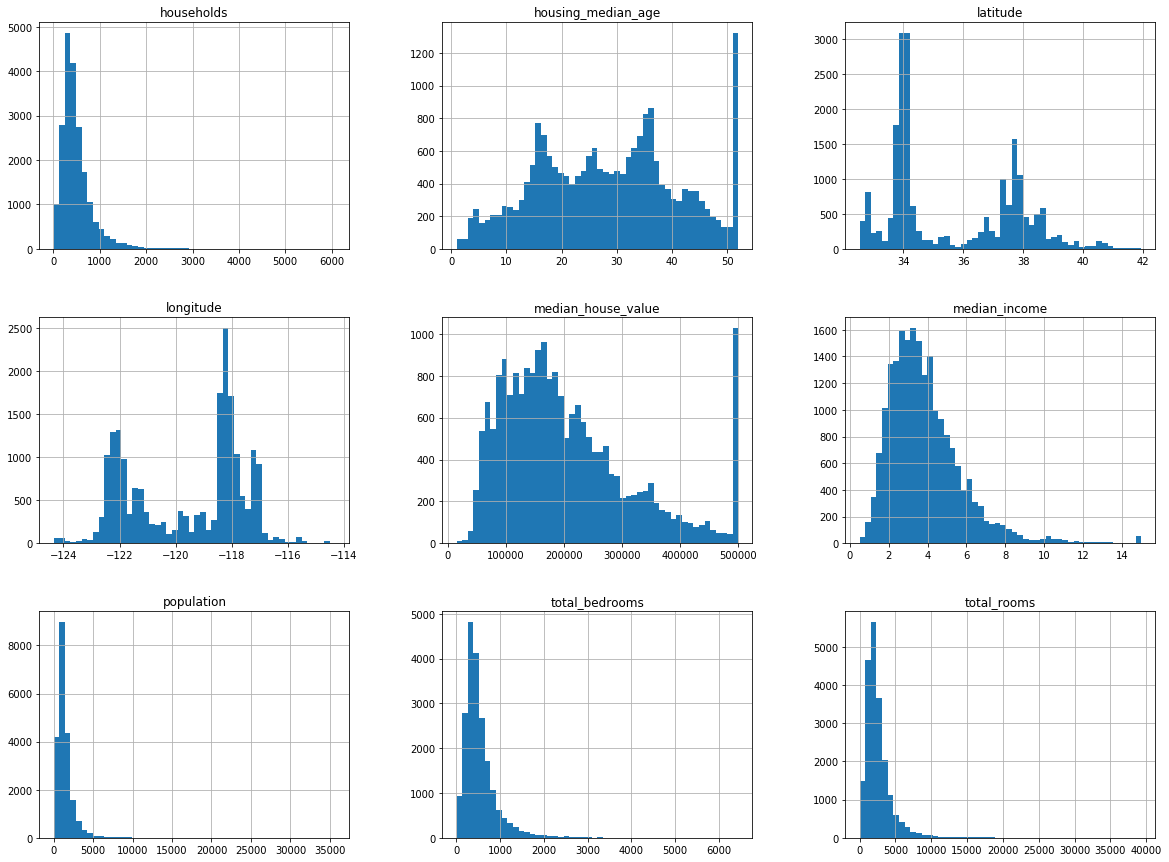

In [5]:
df.hist(bins=50,figsize=(20,15))
plt.show()

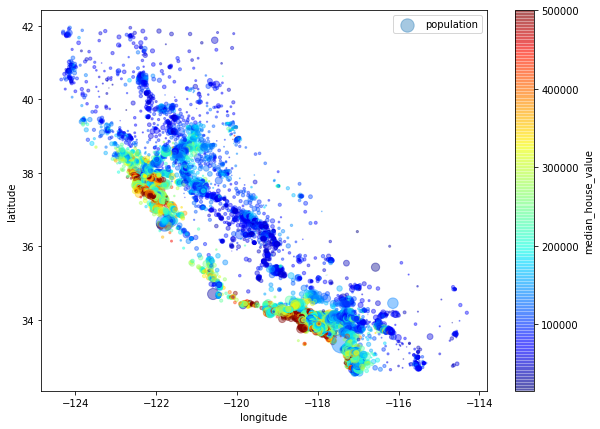

In [6]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [7]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F916123198>,
      dtype=object)

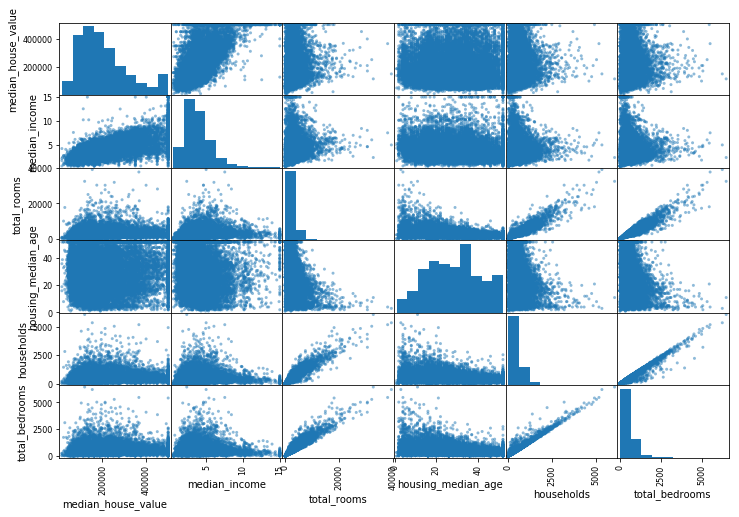

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age", "households", "total_bedrooms"]
scatter_matrix(df[attributes], figsize=(12, 8))

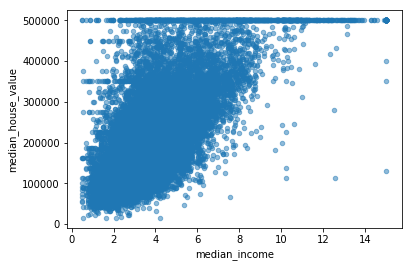

In [9]:
df.plot(kind="scatter", x = "median_income",y="median_house_value",alpha=0.5)

In [10]:
df["median_house_value"].mode()

0    500001.0
dtype: float64

In [11]:
df=df.query("median_house_value != 500001.0")

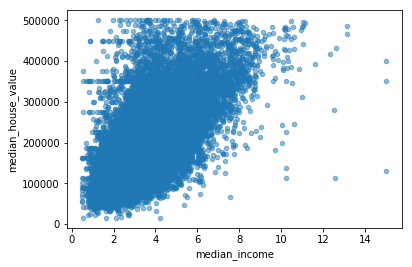

In [12]:
df.plot(kind="scatter", x = "median_income",y="median_house_value",alpha=0.5)

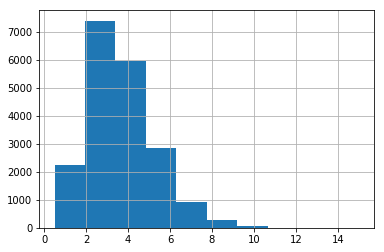

In [13]:
df["median_income"].hist()
df["income_cat"]=np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"]>5,5.0,inplace=True)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index,test_index in split.split(df,df["income_cat"]):
    treina=df.reindex(train_index)
    testa=df.reindex(test_index)

In [15]:
for df in [treina,testa]:
    df["rooms_per_household"] = df["total_rooms"]/df["households"]
    df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
    df["population_per_household"]=df["population"]/df["households"]

In [16]:
def missing(df):
    df = pd.get_dummies(df,columns=["ocean_proximity"], drop_first = True)
    return df

treina=missing(treina)
testa=missing(testa)

In [17]:
corr_matrix = treina.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.631281
income_cat                    0.245279
ocean_proximity_NEAR BAY      0.152683
total_rooms                   0.134960
ocean_proximity_NEAR OCEAN    0.129604
rooms_per_household           0.109984
households                    0.090846
total_bedrooms                0.070589
housing_median_age            0.069838
ocean_proximity_ISLAND        0.034796
population                    0.005261
population_per_household     -0.026866
longitude                    -0.067564
latitude                     -0.116089
bedrooms_per_room            -0.207688
ocean_proximity_INLAND       -0.477228
Name: median_house_value, dtype: float64

In [18]:
def dropcolum(df):
    df=df.drop(["longitude","latitude","households","total_bedrooms",
                "ocean_proximity_ISLAND","population_per_household","population"], axis=1)
    return df

In [19]:
y = treina.iloc[:, 0].values
X = treina.iloc[:, 1:].values

y_t = testa.iloc[:, 0].values
X_t = testa.iloc[:, 1:].values

In [20]:
treina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15740 entries, 7177 to 6017
Data columns (total 17 columns):
longitude                     14991 non-null float64
latitude                      14991 non-null float64
housing_median_age            14991 non-null float64
total_rooms                   14991 non-null float64
total_bedrooms                14838 non-null float64
population                    14991 non-null float64
households                    14991 non-null float64
median_income                 14991 non-null float64
median_house_value            14991 non-null float64
income_cat                    14991 non-null float64
rooms_per_household           14991 non-null float64
bedrooms_per_room             14838 non-null float64
population_per_household      14991 non-null float64
ocean_proximity_INLAND        15740 non-null uint8
ocean_proximity_ISLAND        15740 non-null uint8
ocean_proximity_NEAR BAY      15740 non-null uint8
ocean_proximity_NEAR OCEAN    15740 non-null ui

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X_t=sc.transform(X_t)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').